In [43]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [44]:
weight = 3
bias = 0.8
x = torch.rand(100, 1)
y = weight * x + bias + 0.1 * torch.rand(100, 1)

In [45]:
def plot_data(x, y):
    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

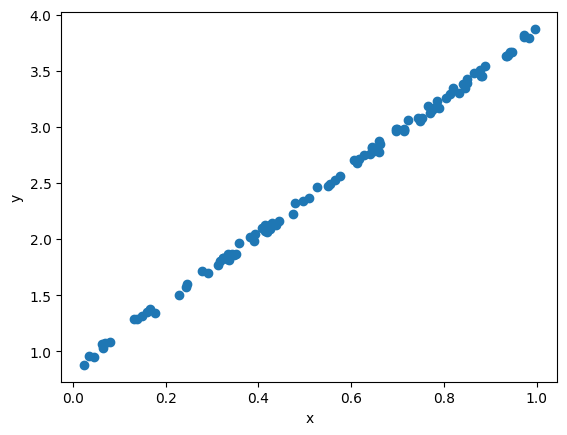

In [46]:
plot_data(x, y)

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, x_test.shape)

torch.Size([80, 1]) torch.Size([20, 1])


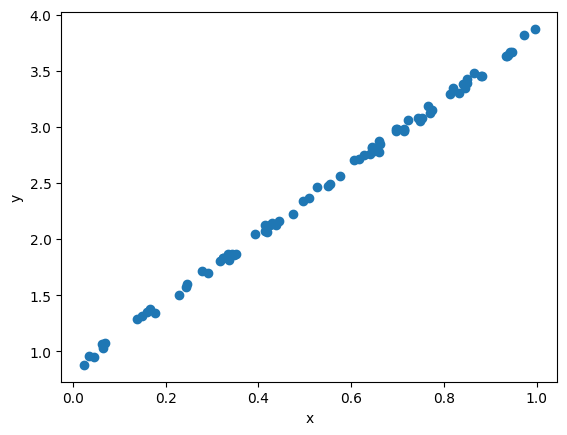

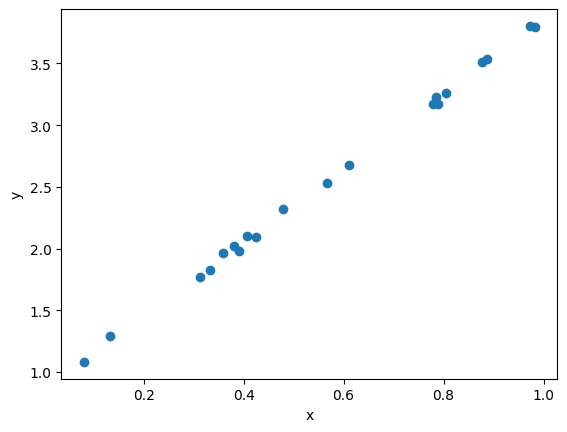

In [48]:
plot_data(x_train, y_train)
plot_data(x_test, y_test)

In [49]:
epochs = 10000
lr = 0.01
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))
    def forward(self, x):
        return self.weight * x + self.bias

In [50]:
model = LinearRegression()
model.state_dict()

OrderedDict([('weight', tensor([-0.1260])), ('bias', tensor([0.1402]))])

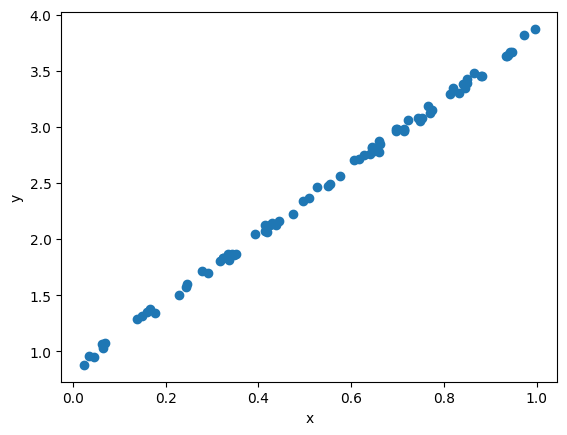

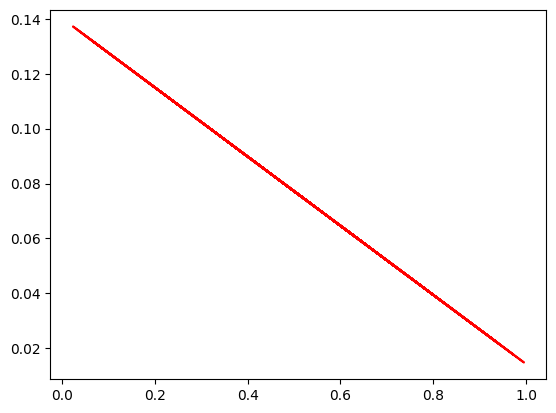

In [51]:
with torch.inference_mode():
    y_pred = model(x_train)

plot_data(x_train, y_train)
plt.plot(x_train, y_pred, color='red')

In [52]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(epochs):
    model.train()

    y_pred = model(x_train)
    
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
        y_pred_test = model(x_test)
        loss_test = loss_fn(y_pred_test, y_test)


    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss {loss.item()}, Loss Test {loss_test.item()}')

Epoch 0, Loss 6.510597229003906, Loss Test 6.560693264007568
Epoch 100, Loss 0.27855879068374634, Loss Test 0.2887449562549591
Epoch 200, Loss 0.19932588934898376, Loss Test 0.19635817408561707
Epoch 300, Loss 0.15981143712997437, Loss Test 0.15670403838157654
Epoch 400, Loss 0.12825629115104675, Loss Test 0.12573757767677307
Epoch 500, Loss 0.1029643565416336, Loss Test 0.10096021741628647
Epoch 600, Loss 0.08269205689430237, Loss Test 0.08110124617815018
Epoch 700, Loss 0.06644311547279358, Loss Test 0.06518207490444183
Epoch 800, Loss 0.05341898277401924, Loss Test 0.052420735359191895
Epoch 900, Loss 0.04297976940870285, Loss Test 0.042190827429294586
Epoch 1000, Loss 0.03461224585771561, Loss Test 0.03398982435464859
Epoch 1100, Loss 0.027905428782105446, Loss Test 0.02741539478302002
Epoch 1200, Loss 0.022529784590005875, Loss Test 0.022144850343465805
Epoch 1300, Loss 0.01822090707719326, Loss Test 0.017919350415468216
Epoch 1400, Loss 0.014767239801585674, Loss Test 0.014531741

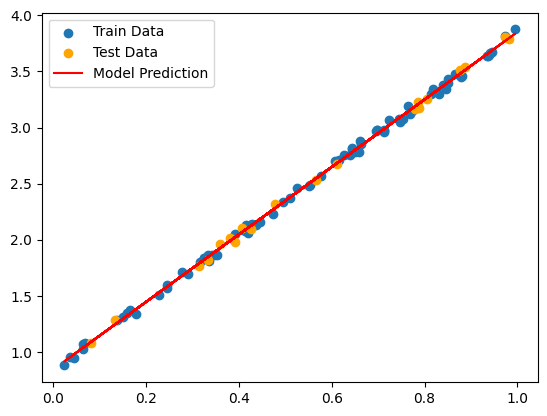

In [53]:
with torch.inference_mode():
    y_pred_train = model(x_train)
    y_pred_test = model(x_test)

plt.scatter(x_train.numpy(), y_train.numpy(), label="Train Data")
plt.scatter(x_test.numpy(), y_test.numpy(), label="Test Data", color='orange')
plt.plot(x_train.numpy(), y_pred_train.numpy(), color='red', label="Model Prediction")
plt.legend()
plt.show()
